# Parts of Speech

This notebook introduces the concept of part-of-speech tagging as an additional way of processing texts. It's part of the [The Art of Literary Text Analysis](ArtOfLiteraryTextAnalysis.ipynb) (and assumes that you've already worked through previous notebooks – see the table of contents). In this notebook we'll look in particular at

* [what's a part-of-speech?](#What's-a-Part-of-Speech?)
* [examining frequencies and distribution for a specific part-of-speech](#Examining-Frequencies-and-Distribution-for-a-Specific-Part-of-Speech)
* [overall frequencies of parts of speech](#Overall-Frequencies-of-Parts-of-Speech)
* [word frequencies by part-of-speech](#Word-Frequencies-by-Part-of-Speech)
* [comparing parts of speech across texts](#Comparing-Parts-of-Speech-across-Texts)

This notebook assumes you've saved a _The Gold Bug_ into a plain text file, as described in [Getting Texts](GettingTexts.ipynb). If that's not the case, you may wish to include the following:

```python
import urllib.request
# retrieve Poe plain text value
poeUrl = "http://www.gutenberg.org/cache/epub/2147/pg2147.txt"
poeString = urllib.request.urlopen(poeUrl).read().decode()```

And then this, in a separate cell so that we don't read repeatedly from Gutenberg:

```python
import os
# isolate The Gold Bug
start = poeString.find("THE GOLD-BUG")
end = poeString.find("FOUR BEASTS IN ONE")
goldBugString = poeString[start:end]
# save the file locally
directory = "data"
if not os.path.exists(directory):
    os.makedirs(directory)
with open("data/goldBug.txt", "w") as f:
    f.write(goldBugString)```

## What's a Part of Speech?

We've already examined several ways of transforming and mapping words in a text:

* case manipulation: BUG, Bug, bug  => bug
* stemming & lemmatization (bug, bugs => bug)
* word sense grouping (bug, beetle => bugword)

Another tool at our disposal is to try to determine the part-of-speech of words in a text. [Parts of speech](http://en.wikipedia.org/wiki/Part_of_speech) are linguistic categories that identify the syntactic function of words, such as determiners (or articles), nouns, verbs, adjectives, prepositions, etc. Imagine, for instance, that we could determine that Text A has more adjectives per total number of words than Text B – might that allow us to speculate that Text A is more descriptive than Text B?

Let's first look at the mechanics of identifying – or tagging – parts of speech in our text. We'll begin by reading in our _Gold Bug_ text and tokenizing it.

In [7]:
import nltk
# read Gold Bug plain text into string
with open("data/goldBug.txt", "r") as f:
    goldBugString = f.read()
goldBugTokens = nltk.word_tokenize(goldBugString) # tokenize the words (without transformation)

Consistent with other first encounters in this guide, we'll initially use the simplest syntax possible to tag the parts of speech in our tokens list, namely calling ```nltk.pos_tag()``` with our list of tokens as an argument.

In [8]:
goldBugTagged = nltk.pos_tag(goldBugTokens)

(Some people have reported problems with Windows and Anaconda, related to character encoding issues in NLTK – here's [one possible solution](http://stackoverflow.com/questions/25590089/nltk-3-pos-tag-throws-unicodedecodeerror).)

Tagging this way is an "expensive" operation, which is a computer programming way of saying that it's an intensive process that takes time and resources (like URL fetching, we want to do it as infrequently as possible). Behind the scenes, NLTK is loading a large dataset that it's using to help improve the tagging results.

Let's take a peek at the first 22 token-tag pairs:

In [9]:
goldBugTagged[:22]

[('THE', 'DT'),
 ('GOLD-BUG', 'NNP'),
 ('What', 'WP'),
 ('ho', 'NN'),
 ('!', '.'),
 ('what', 'WP'),
 ('ho', 'NN'),
 ('!', '.'),
 ('this', 'DT'),
 ('fellow', 'NN'),
 ('is', 'VBZ'),
 ('dancing', 'VBG'),
 ('mad', 'JJ'),
 ('!', '.'),
 ('He', 'PRP'),
 ('hath', 'VBD'),
 ('been', 'VBN'),
 ('bitten', 'VBN'),
 ('by', 'IN'),
 ('the', 'DT'),
 ('Tarantula', 'NNP'),
 ('.', '.')]

We see here a list of tuples with each tuple being composed of a token from the text and a code representing the part-of-speech. The codes are listed at the [Penn Treebank Project](http://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) and includes the following:

* DT: determiner (the, a…)
* IN: preposition (to, from, …)
* JJ: adjective (big, smart…)
* NN: noun (car, school…)
* NNP: proper noun (Montreal, Jill…)
* PRP: personal pronoun (she, I…)
* RB: adverb (freely, calmly…)
* VBD, VBG, VBN, VBZ: verbs (dancing, said, been, is…)
* WP: wh-pronoun (who, what…)

Looking back at our initial list, we can see there are some correct tags, but others that seem dubious. For instance, _GOLD-BUG_ is incorrectly tagged as an ajdective (short titles are difficult to parse), and _hath_ is tagged as a noun (archaic forms are also difficult).

It's worth reiterating that the computer doesn't understand anything about the language being used, it's making a statistical guess based on the training sets that it's already seen. In other words, based on a corpus eclectic texts (including the [Brown Corpus](http://en.wikipedia.org/wiki/Brown_Corpus), the part-of-speech tagger we're using is identifying certain words as, say, determiners, because that's how they were tagged previously. Some words can be a different part-of-speech depending on context (dance as a verb or dance as a noun), and the tagging may depend on words that precede or follow. Some words it simply won't recognize and may just guess at depending on the adjacent tags (or a default tag).

For relatively normal modern English texts we can expect an accuracy of about 85-90%, which is far from perfect, but which does allow us to explore the texts in new ways.

## Examining Frequencies and Distribution for a Specific Part of Speech

In [10]:
goldBugAdjectives = [token for token, pos in goldBugTagged if "JJ" == pos]
goldBugAdjectivesFreqs = nltk.FreqDist(goldBugAdjectives)
goldBugAdjectivesFreqs.plot(20)

This might lead us to explore how terms some apparent opposites are used, such as "first" and "last", "old" and "new", "few" and "many", "large" and "little".

Another potentially useful part-of-speech to consider is proper names (NNP for singular and NNPS for plural).

In [11]:
goldBugProperNouns = [token for token, pos in goldBugTagged if "NNP" in pos]
nltk.FreqDist(goldBugProperNouns).plot(20)

Once again we see some noisy (inaccurate) results, but some of these words may warrant a closer look.

In [12]:
goldBugText = nltk.Text(goldBugTokens)
goldBugText.dispersion_plot(["Jupiter","Legrand","Jup","Kidd","Charleston"])

## Overall Frequencies of Parts of Speech

We've looked at adjectives and proper nouns, but each part of speech might lead us to some insights, and it might be valuable to look at the overall tag frequencies:

  NN   IN   DT    ,  PRP   JJ   RB  VBD    .   VB   CC  NNS  VBN    :   TO  NNP   '' PRP$  VBP   ``  VBG   CD   MD  VBZ   FW 
2172 1814 1579 1302 1122  945  824  814  717  534  526  441  383  348  329  316  270  264  254  248  213  207  175  171  114 


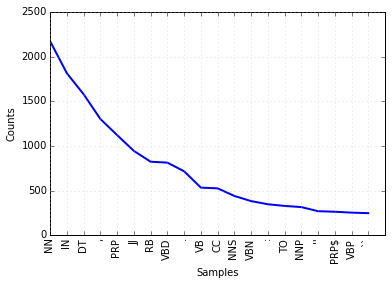

In [13]:
%matplotlib inline
goldBugTags = [pos for word, pos in goldBugTagged]
goldBugTagsFreqs = nltk.FreqDist(goldBugTags)
goldBugTagsFreqs.tabulate(25)
goldBugTagsFreqs.plot(20)

The graph isn't quite the usual fit for Zipf's Law (which we saw when looking at the most frequent terms in the text), but it's still pretty close. In other words, even frequency of parts of speech follow a similar trend.

There are some part-of-speech categories that could be grouped together. For instance, we might want to consider all punctuation as the same (instead of separate tags for end-of-sentence and mid-sentence punctuation).

In [14]:
goldBugTagsNormalizedPunctuation = [pos if pos.isalpha() else "." for pos in goldBugTags]
nltk.FreqDist(goldBugTagsNormalizedPunctuation).tabulate(20)

   .   NN   IN   DT  PRP   JJ   RB  VBD   VB   CC  NNS  VBN   TO  NNP  VBP  VBG   CD   MD  VBZ   FW 
3201 2172 1814 1579 1122  945  824  814  534  526  441  383  329  316  254  213  207  175  171  114 


Many of the tags have a third letter to specify a subcategory of tag, but we could keep just the first two letters to have more general categories. As such VB, VBD, VBP, VBG and VBZ would all be simply VB.

In [15]:
goldBugTagsNormalized = [pos[0:2] if pos.isalpha() else "." for pos in goldBugTags]
goldBugTagsNormalizedFreqs = nltk.FreqDist(goldBugTagsNormalized)
goldBugTagsNormalizedFreqs.tabulate(25)

   .   NN   VB   IN   DT   PR   JJ   RB   CC   TO   CD   MD   FW   WR   WD   WP   PO   RP   EX   PD   UH 
3201 2930 2369 1814 1579 1122 1009  855  526  329  207  175  114  106   96   79   62   51   35   14   13 


We could also look at the distribution of parts of speech using our normalized tags.

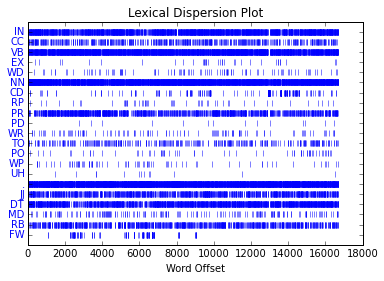

In [16]:
nltk.Text(goldBugTagsNormalized).dispersion_plot(list(goldBugTagsNormalizedFreqs.keys()))

There may be a variety of things to further examine here, but one curious artefact is an apparent gap in all but the top (punctuation) line at about the 13,000 word offset marker (about four fifth of the way across). With a bit of tweaking we can get closer to the specific token.

In [17]:
print(goldBugTagged[12900:13035])

[('and', 'CC'), ('the', 'DT'), ('goat', 'NN'), (':', ':'), ('``', '``'), ('53‡‡†305', 'CD'), (')', ')'), (')', ')'), ('6*', 'CD'), (';', ':'), ('4826', 'CD'), (')', ')'), ('4‡', 'CD'), (')', ')'), ('4‡', 'CD'), (')', ')'), (';', ':'), ('806*', 'CD'), (';', ':'), ('48†8¶60', 'CD'), (')', ')'), (')', ')'), ('85', 'CD'), (';', ':'), ('1‡', 'CD'), (')', ')'), (';', ':'), (':', ':'), ('‡', 'NN'), ('*8†83', 'NNP'), ('(', '('), ('88', 'CD'), (')', ')'), ('5*†', 'CD'), (';', ':'), ('46', 'CD'), ('(', '('), (';', ':'), ('88*96*', 'CD'), ('?', '.'), (';', ':'), ('8', 'CD'), (')', ')'), ('*‡', 'NN'), ('(', '('), (';', ':'), ('485', 'CD'), (')', ')'), (';', ':'), ('5*†2', 'CD'), (':', ':'), ('*‡', 'NN'), ('(', '('), (';', ':'), ('4956*', 'CD'), ('2', 'CD'), ('(', '('), ('5*', 'CD'), ('--', ':'), ('4', 'CD'), (')', ')'), ('8¶8*', 'CD'), (';', ':'), ('4069285', 'CD'), (')', ')'), (';', ':'), (')', ')'), ('6†8', 'CD'), (')', ')'), ('4‡‡', 'CD'), (';', ':'), ('1', 'CD'), ('(', '('), ('‡9', 'NN'), (';'

From reading the text we may recognize this as one of the moments with encrypted text with a lot of punctuation, digits and other non alphabetic characters. We could even search for "the goat:" and show some of the text following it to see the string in context.

In [18]:
theGoat = goldBugString.find("the goat:")
print(goldBugString[theGoat-100:theGoat+300])

nspection. The following characters were rudely traced, in a red
tint, between the death's-head and the goat:

  "53‡‡†305))6*;4826)4‡)4‡);806*;48†8¶60))85;1‡);:‡
  *8†83(88)5*†;46(;88*96*?;8)*‡(;485);5*†2:*‡(;4956*
  2(5*--4)8¶8*;4069285);)6†8)4‡‡;1(‡9;48081;8:8‡1;4
  8†85;4)485†528806*81(‡9;48;(88;4(‡?34;48)4‡;161;:
  188;‡?;"

"But," said I, returning him the slip, "I am as much in the dark as



We knew that _The Gold Bug_ text has some peculiarities, but it's also reassuring to see that some fairly simple experiments with parts-of-speech allowed us to identify one of the unusual aspects of the text, namely, the encrypted code.

## Word Frequencies by Part of Speech

It might also be interesting to see what the top frequency terms are for each part-of-speech category. To do this we'll need to go back to the tagged list that includes both words and pos, but we'll normalize the pos as we've done above.

In [19]:
goldBugTaggedNormalized = [(word, pos[0:2] if pos.isalpha() else ".") for word, pos in goldBugTagged]

We can see what parts-of speech are contained in this list:

In [20]:
goldBugTagsNormalized = set([pos for word, pos in goldBugTaggedNormalized]) # get unique pos tags
print(len(goldBugTagsNormalized))

21


Instead of looking at all parts-of-speech, we could further refine our list to cases where there are more than two different words in the category. To do this we'll need to build a frequency list and keep track of any categories that have two or fewer words. We'll also skip punctuation.

In [21]:
goldBugTagsNormalizedAndFiltered = []
for currentpos in goldBugTagsNormalized:
    freqs = nltk.FreqDist([word.lower() for word, pos in goldBugTaggedNormalized if currentpos == pos])
    if len(freqs)>2 and currentpos != ".":
        goldBugTagsNormalizedAndFiltered.append(currentpos)
print(goldBugTagsNormalizedAndFiltered)    

['IN', 'CC', 'PO', 'VB', 'MD', 'WR', 'WD', 'EX', 'NN', 'RP', 'CD', 'JJ', 'PR', 'PD', 'WP', 'DT', 'RB', 'FW']


We could simply loop through each tag and create a graph of the top frequency terms, something like this:

```python
for currentpos in goldBugTagsNormalizedAndFiltered:
    words = [word for word, pos in goldBugTaggedNormalized if pos == currentpos]
    freqs = nltk.FreqDist(words)
    freqs.plot(20, title=currentpos)```

But that would take up a lot of space vertically in our notebook, which means more scrolling, but also potentially more difficult to compare different graphs.

What we can do instead is to use [matplotlib.pyplot.subplot()](http://matplotlib.org/api/pyplot_api.html?highlight=subplot#matplotlib.pyplot.subplot) to draw a grid. We can set the number of rows and columsn by hand or we can set them programmatically depending on the content we have. Let's first determine how many pos tags we have.

In [22]:
len(goldBugTagsNormalizedAndFiltered)

18

So, assuming we want three columns of graphs, now need to calculate how many rows we need, which is esentially 14/3 plus one row for any remainder. The way to calculate that in Python is with the [math.ceil()](https://docs.python.org/3.4/library/math.html#math.ceil) function, which rounds a decimal number up to the next integer.

In [25]:
import math

goldBugTagsGridRows = math.ceil(len(goldBugTagsNormalizedAndFiltered)/3) # the number of rows we need
goldBugTagsGridRows # 4 rows of 3 plus 1 row of 2 = 5 rows, 14 cells

6

Now, let's build our grid of graphs with subplot.

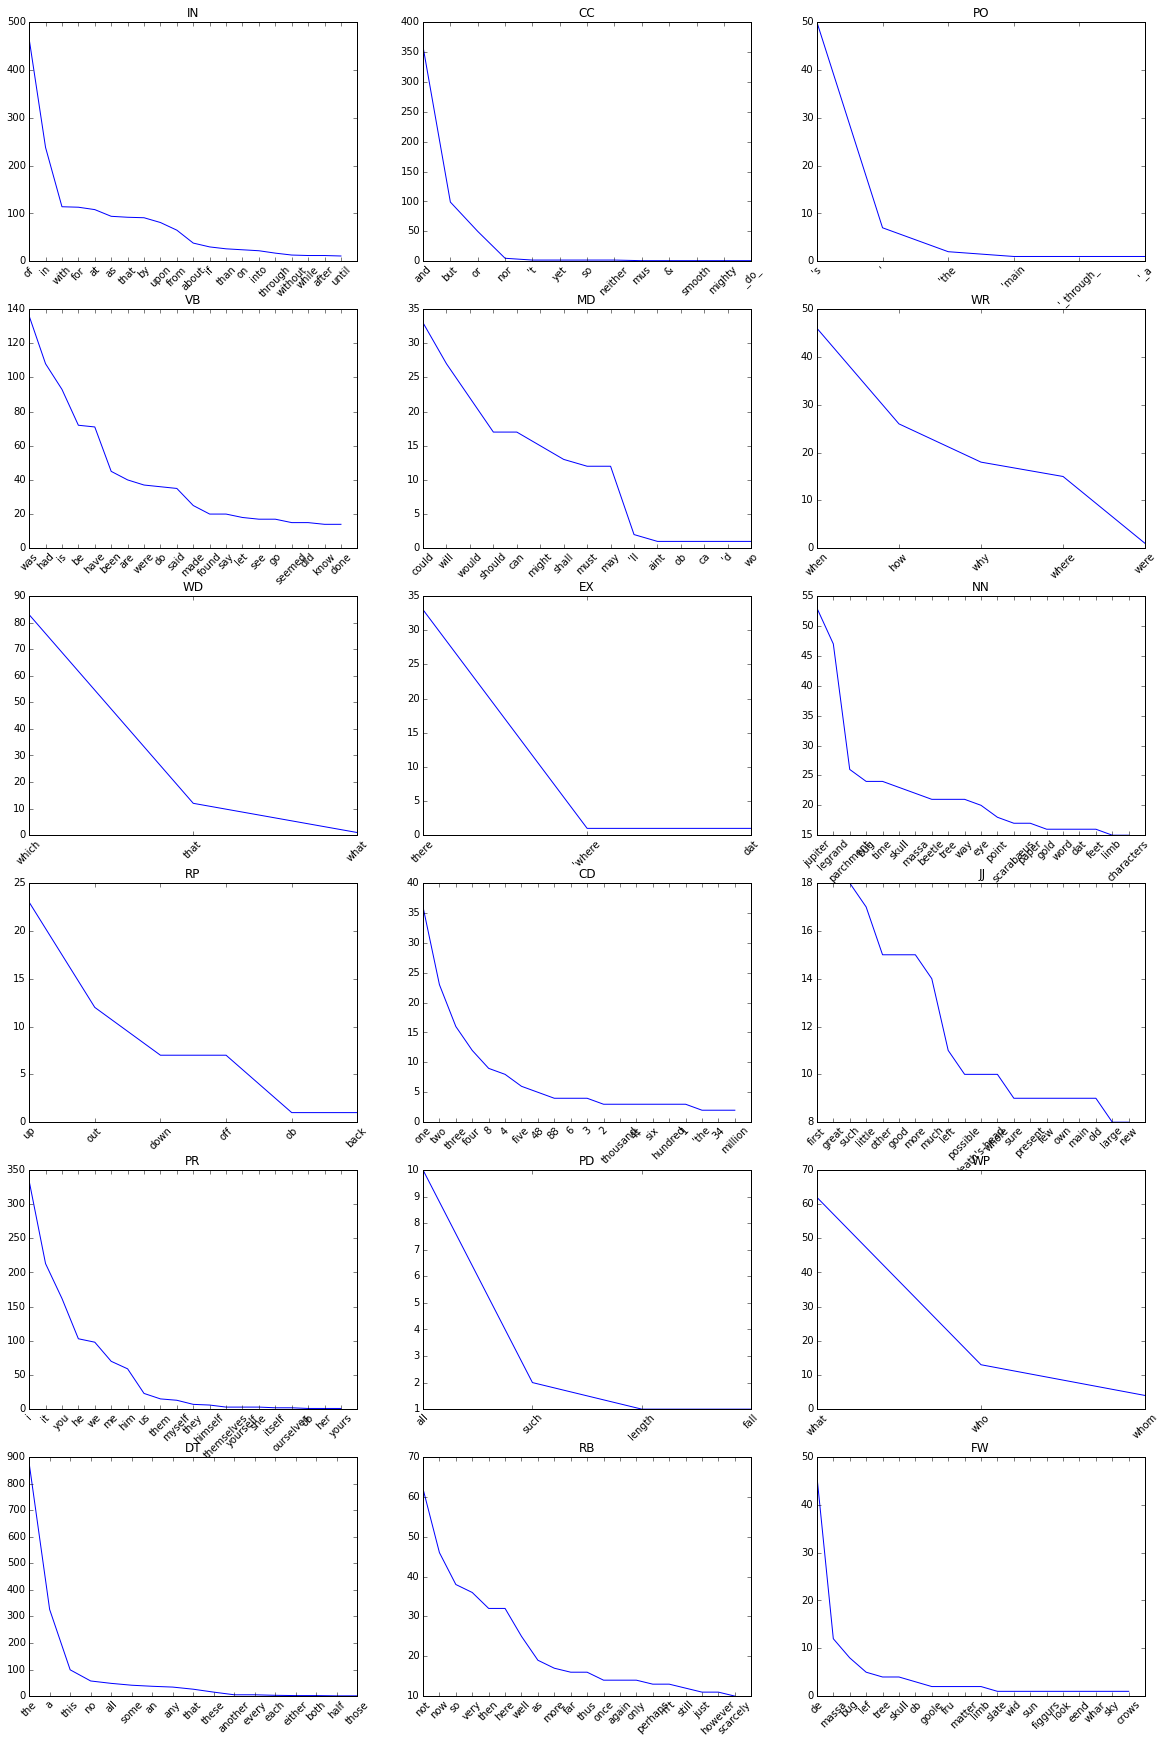

In [31]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(goldBugTagsGridRows, 3, figsize=(20, 30)) # define the number of row, columns, and overall size
for idx, currentpos in enumerate(goldBugTagsNormalizedAndFiltered): # this gives us an indexed enumeration 
    words = [word.lower() for word, pos in goldBugTaggedNormalized if pos == currentpos] # count only current pos
    freqs = nltk.FreqDist(words).most_common(20) # take a subset of most common words
    plt.subplot(goldBugTagsGridRows, 3, (idx+1)) # select the grid location that corresponds to the index (of 14)
    plt.plot([count for token, count in freqs]) # plot the counts
    plt.xticks(range(len(freqs)), [token for token, count in freqs], rotation=45) # plot the words
    plt.title(currentpos) # set the title

## Comparing Parts of Speech across Texts

Looking at linguistic phenomenon within a text can be enlightening, as we've seen, but sometimes it's also useful to compare what we observe with other texts. For instance, what can we say about the ratio of adjectives in one text until we compare it with another?

We've been focusing on _The Gold Bug_ (in part because acquring a text from a URL is such a useful operation), but our NLTK data also includes several corpora already available locally. For instance, there's a set of texts from Gutenberg that are available – we can view the list of file names with ```nltk.corpus.gutenberg.fileids()```.

We can also view the text length of each one (note that we're using a [format specification](https://docs.python.org/3.4/library/string.html#formatspec) in order to separate our thousands).

In [27]:
for fileid in nltk.corpus.gutenberg.fileids():
    text = nltk.corpus.gutenberg.raw(fileid) # raw() reads in the string
    length = len(text)
    print(fileid + ":", '{:,}'.format(length))

austen-emma.txt: 887,071
austen-persuasion.txt: 466,292
austen-sense.txt: 673,022
bible-kjv.txt: 4,332,554
blake-poems.txt: 38,153
bryant-stories.txt: 249,439
burgess-busterbrown.txt: 84,663
carroll-alice.txt: 144,395
chesterton-ball.txt: 457,450
chesterton-brown.txt: 406,629
chesterton-thursday.txt: 320,525
edgeworth-parents.txt: 935,158
melville-moby_dick.txt: 1,242,990
milton-paradise.txt: 468,220
shakespeare-caesar.txt: 112,310
shakespeare-hamlet.txt: 162,881
shakespeare-macbeth.txt: 100,351
whitman-leaves.txt: 711,215


So, care to guess which of Carroll's _Alice in Wonderland_ or Edgar Allan Poe's _The Gold Bug_ seems to have more adjectives compared to the total number of word tokens? Let's define our own helper function.

In [28]:
def get_percentage_pos(string, pos):
    tokens = nltk.word_tokenize(string)
    tagged = nltk.pos_tag(tokens)
    matching_tagged = [word for word, p in tagged if pos == p]
    return len(matching_tagged) / len(tagged)

And now use our function for each one of our texts.

In [29]:
aliceString = nltk.corpus.gutenberg.raw("carroll-alice.txt")
print("Alice has", '{:.2%}'.format(get_percentage_pos(aliceString, "JJ")), "adjectives")
print("Gold Bug has", '{:.2%}'.format(get_percentage_pos(goldBugString, "JJ")), "adjectives")

Alice has 4.36% adjectives
Gold Bug has 5.66% adjectives


According to this, it would appear that _Alice in Wonderland_ has relatively more adjectives than _The Gold Bug_.

## Next Steps

Here are some tasks to try:

* Instead of using a normalized 2-letter code for the verb tags, keep the original tags and try to construct an argument about the different types of verbs in _The Gold Bug_.
* Which part-of-speech has the greatest percentage difference between _Alice_ and _Gold Bug_? Try using a loop for the parts-of-speech.
* Which text in Gutenberg has the greatest percentage of adjectives? Try using a loop for the texts.

Next we will look at analyzing [repeating phrases](RepeatingPhrases.ipynb).

---
[CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/) From [The Art of Literary Text Analysis](ArtOfLiteraryTextAnalysis.ipynb) by [Stéfan Sinclair](http://stefansinclair.name) &amp; [Geoffrey Rockwell](http://geoffreyrockwell.com)<br >Created February 16, 2015 and last modified December 9, 2015 (Jupyter 4)